In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv(r"C:\Users\91997\Downloads/LoanAmountlPrediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#calculating percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)  # TOTAL count of missing values per column
percent_1 = (df.isnull().sum() / df.shape[0]) * 100 #percentage of missing values per columns
percent_2 = round(percent_1,1).sort_values(ascending=False)   #percentage rounded to 1 decimal
missing_data = pd.concat([total,percent_2],axis=1, keys=['Total','%'])   #concatenate the two data. #Series into data frame
missing_data.head(3)# Display the top 3 columns with missing data

,Total,%
Credit_History,49,8.2
LoanAmount,21,3.5
Loan_Amount_Term,14,2.3


In [7]:
from sklearn.impute import KNNImputer
x=df[['Dependents','LoanAmount','Credit_History','Loan_Amount_Term']]
# create an object
imputer=KNNImputer(n_neighbors=2)
# fit and tranform the value
x=imputer.fit_transform(x)

In [8]:
# converting the array into dataframe
df[['Dependents','LoanAmount','Credit_History','Loan_Amount_Term']]=pd.DataFrame(x,columns=['Dependents','LoanAmount','Credit_History','Loan_Amount_Term'])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

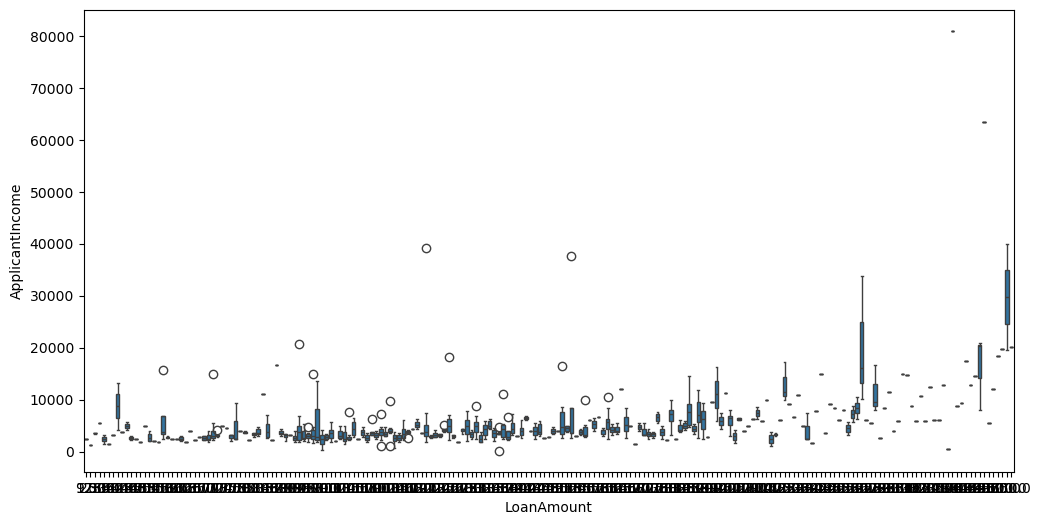

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='ApplicantIncome')


<Axes: xlabel='LoanAmount', ylabel='Loan_ID'>

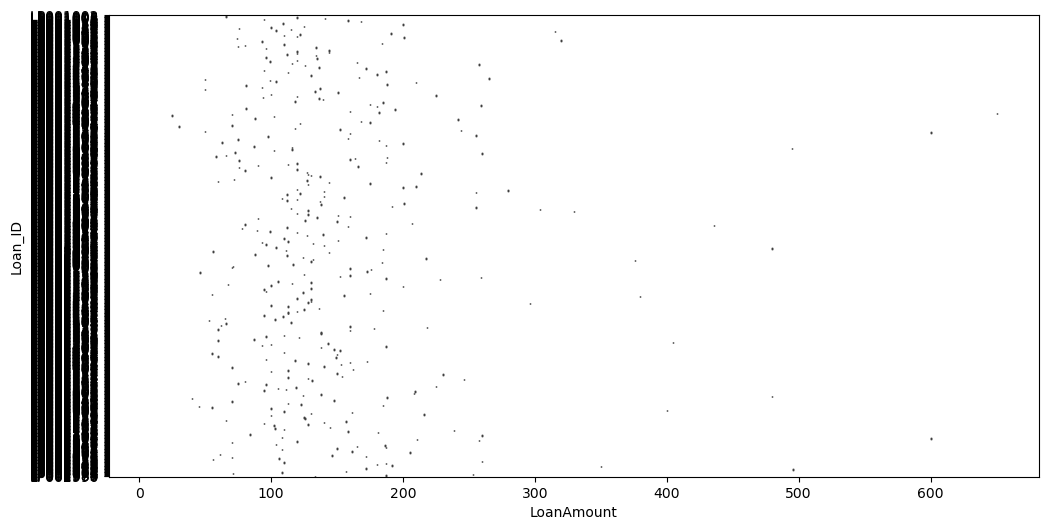

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Loan_ID')


<Axes: xlabel='LoanAmount', ylabel='Loan_ID'>

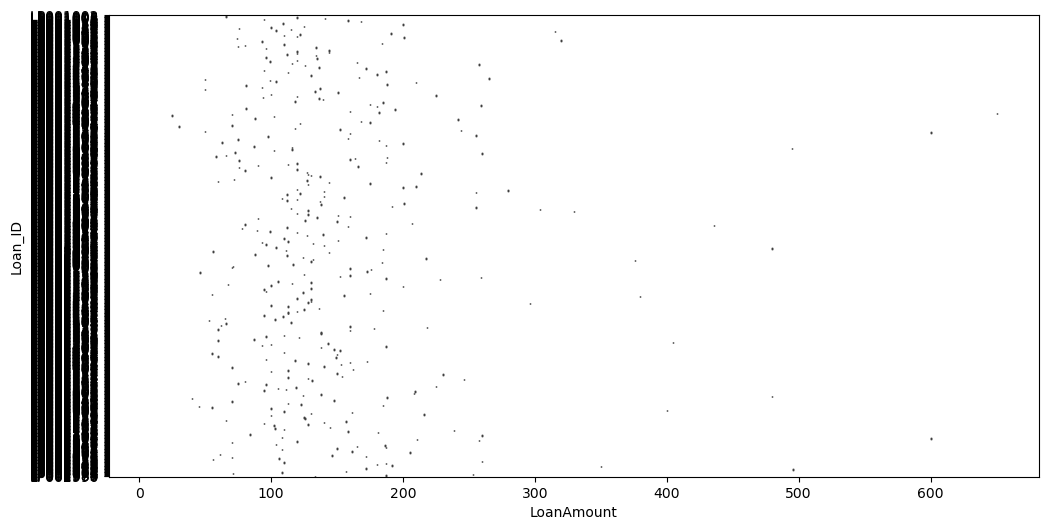

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Loan_ID')

<Axes: xlabel='LoanAmount', ylabel='Married'>

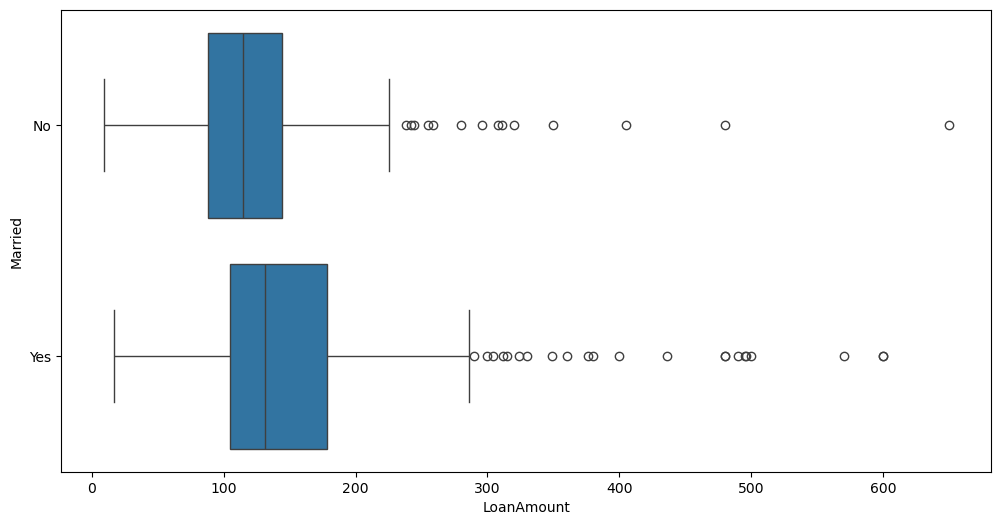

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Married')

<Axes: xlabel='LoanAmount', ylabel='Dependents'>

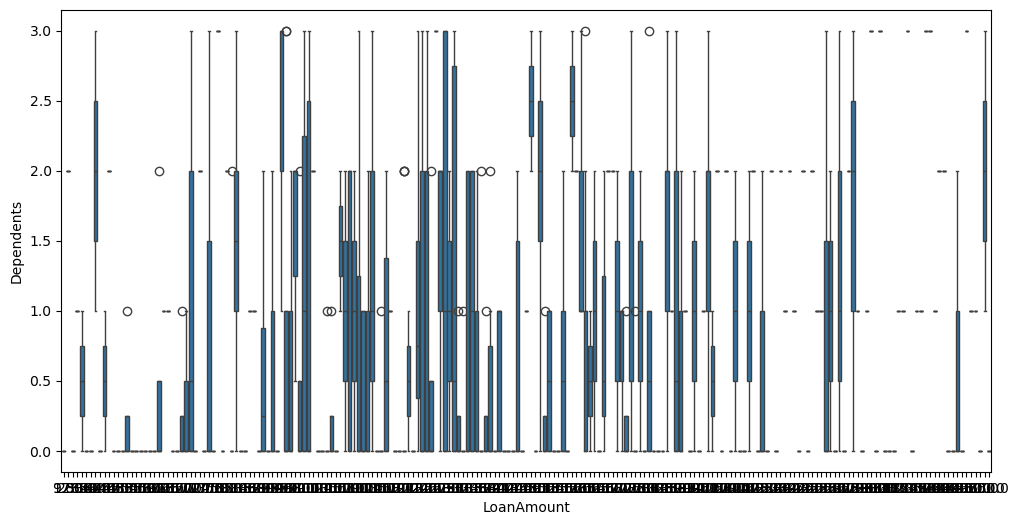

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Dependents')

<Axes: xlabel='LoanAmount', ylabel='Education'>

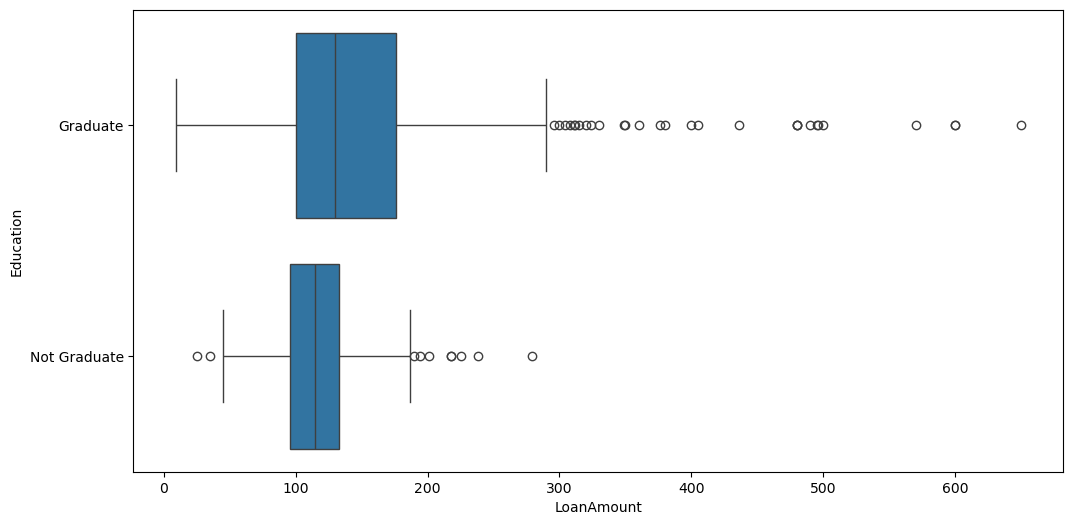

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Education')

<Axes: xlabel='LoanAmount', ylabel='Self_Employed'>

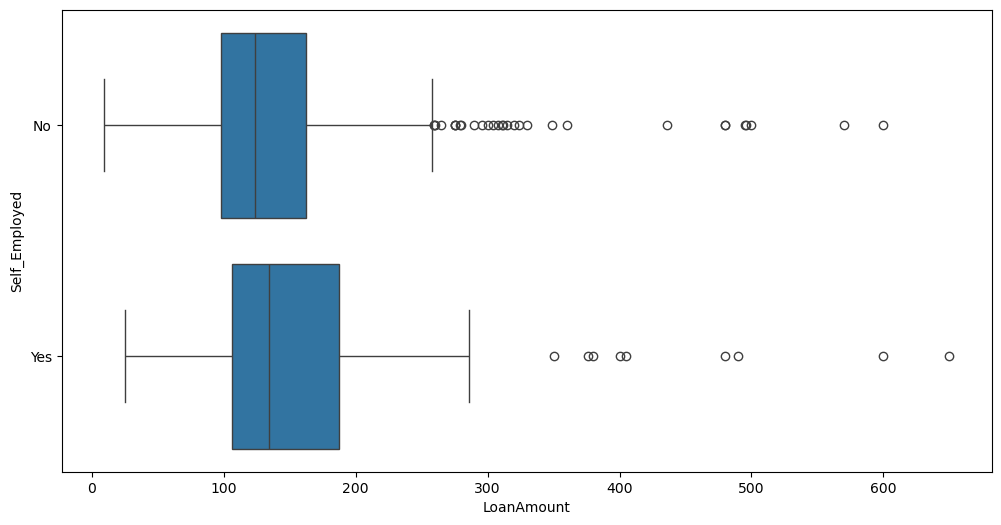

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Self_Employed')

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

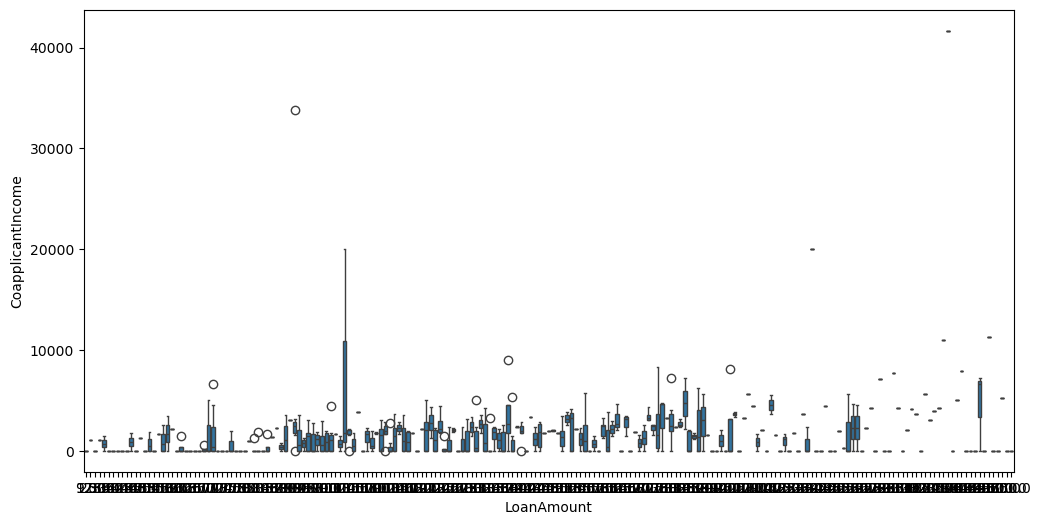

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='CoapplicantIncome')

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

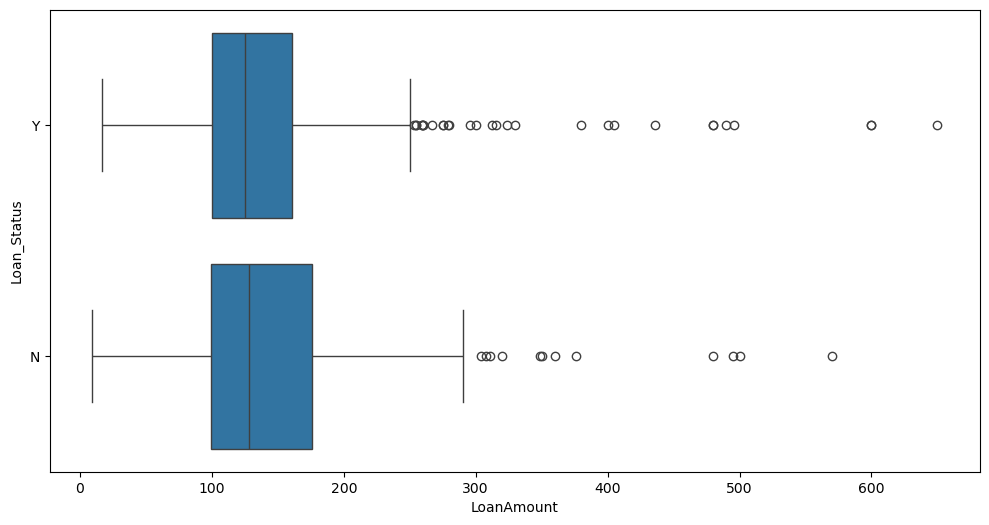

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Loan_Status')

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

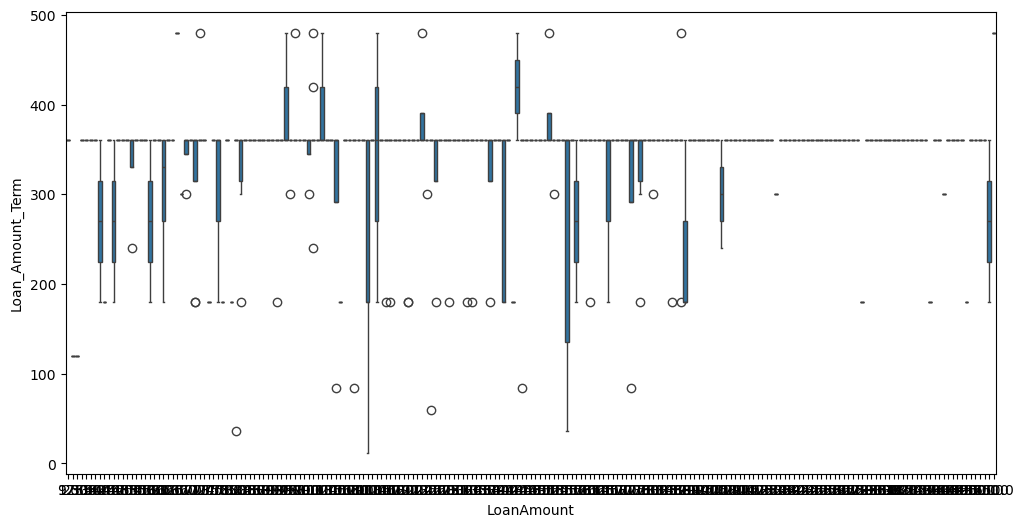

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Loan_Amount_Term')

<Axes: xlabel='LoanAmount', ylabel='Credit_History'>

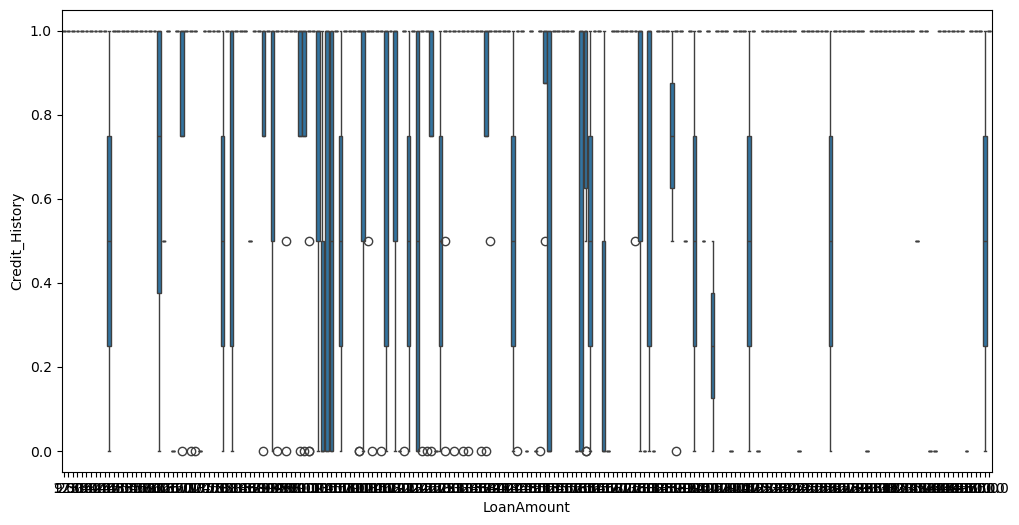

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Credit_History')

<Axes: xlabel='LoanAmount', ylabel='Property_Area'>

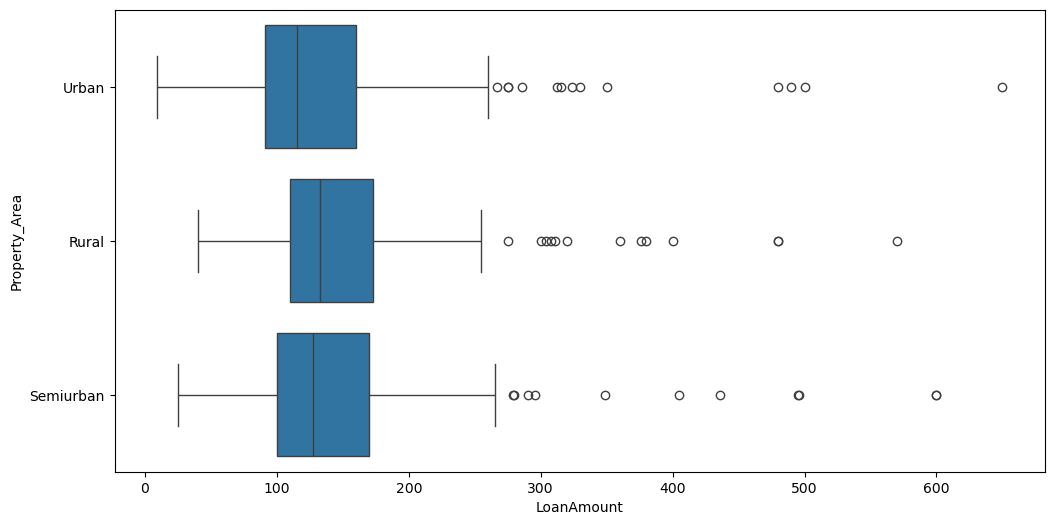

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanAmount',y='Property_Area')

Text(0.5, 1.0, 'LoanAmount vs Credit_History')

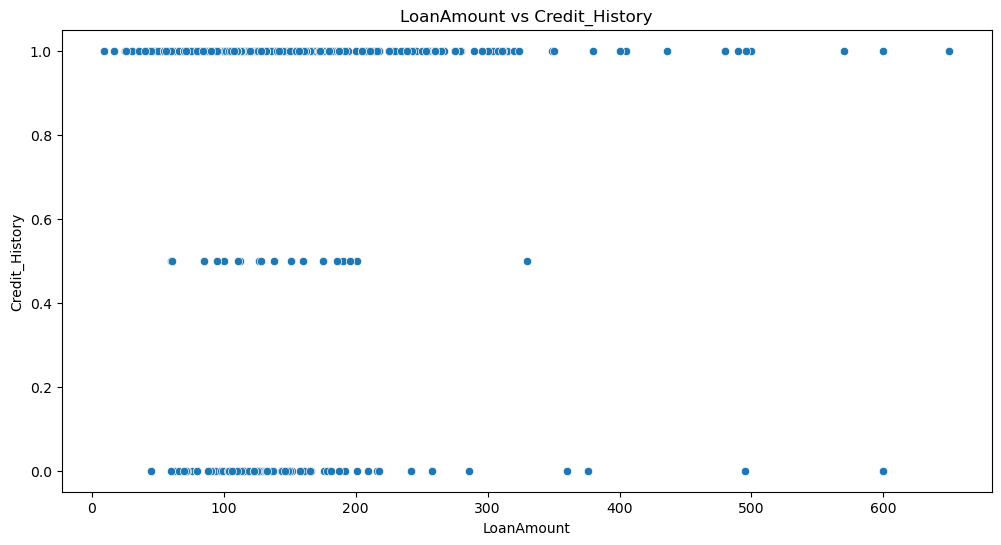

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='LoanAmount',y='Credit_History')
plt.title('LoanAmount vs Credit_History')

Text(0.5, 1.0, 'LoanAmount vs CoapplicantIncome ')

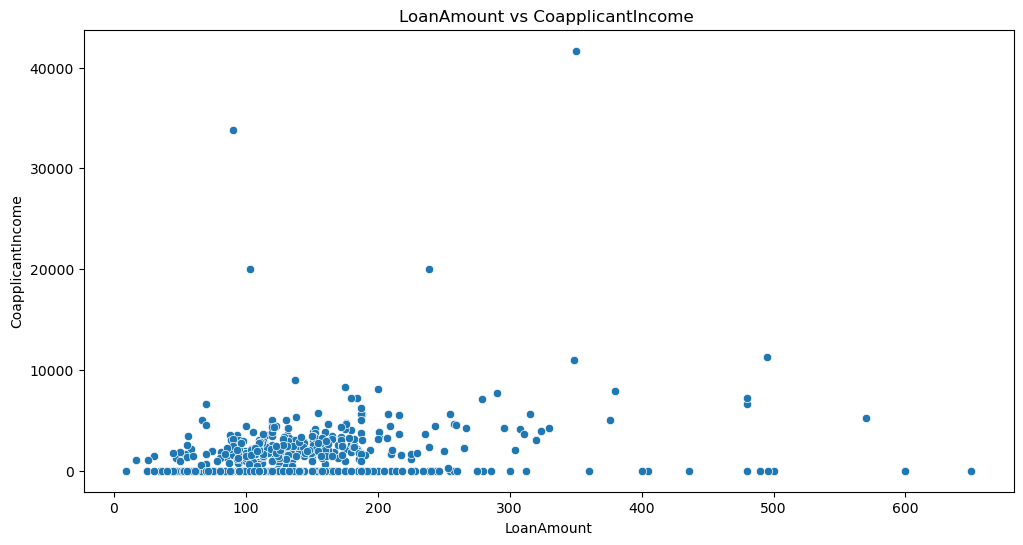

In [24]:
 plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='LoanAmount',y='CoapplicantIncome')
plt.title('LoanAmount vs CoapplicantIncome ')

Text(0.5, 1.0, 'LoanAmount vs Loan_Amount_Term')

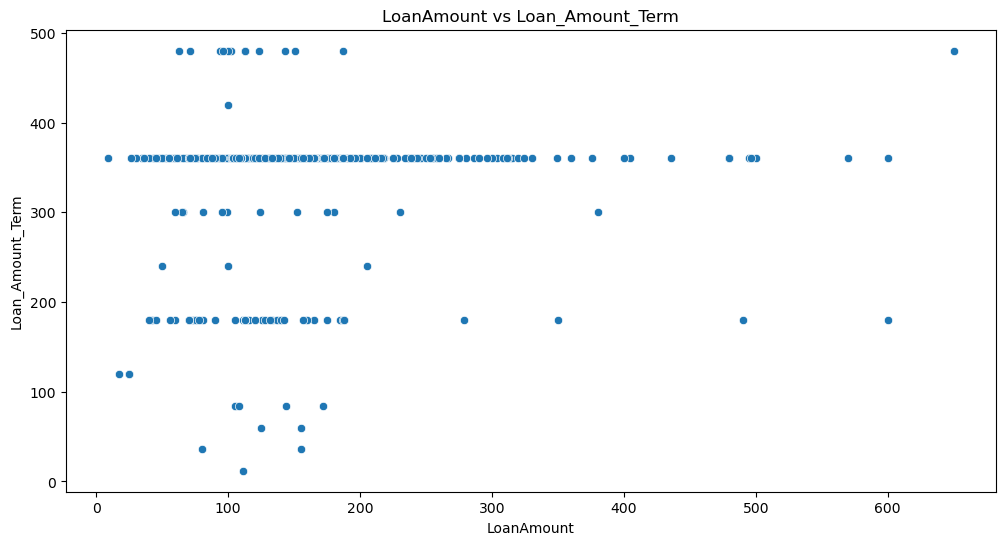

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='LoanAmount',y='Loan_Amount_Term')
plt.title('LoanAmount vs Loan_Amount_Term')

Text(0.5, 1.0, 'LoanAmount vs ApplicantIncome')

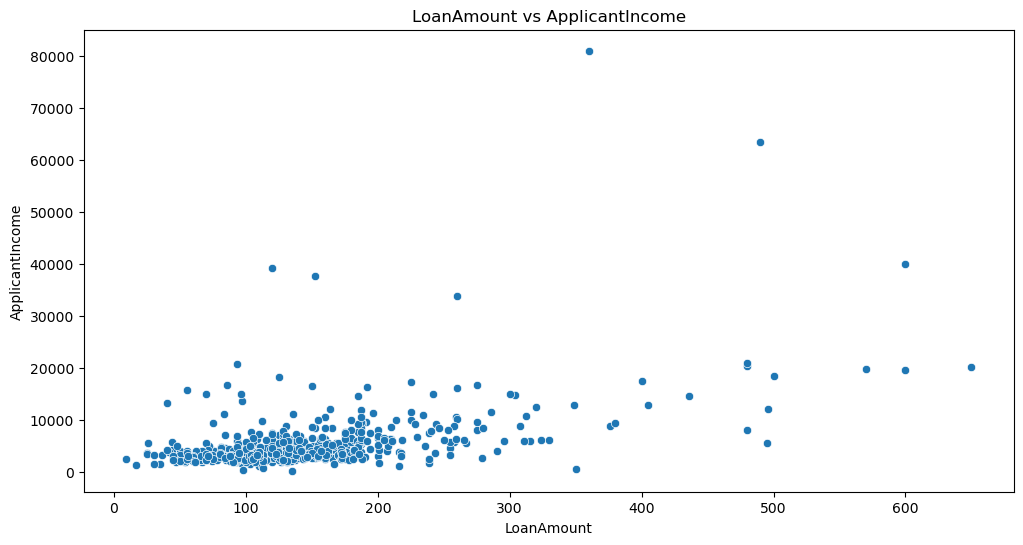

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='LoanAmount',y='ApplicantIncome')
plt.title('LoanAmount vs ApplicantIncome')

In [27]:
df_numeric=df.select_dtypes(include='number')

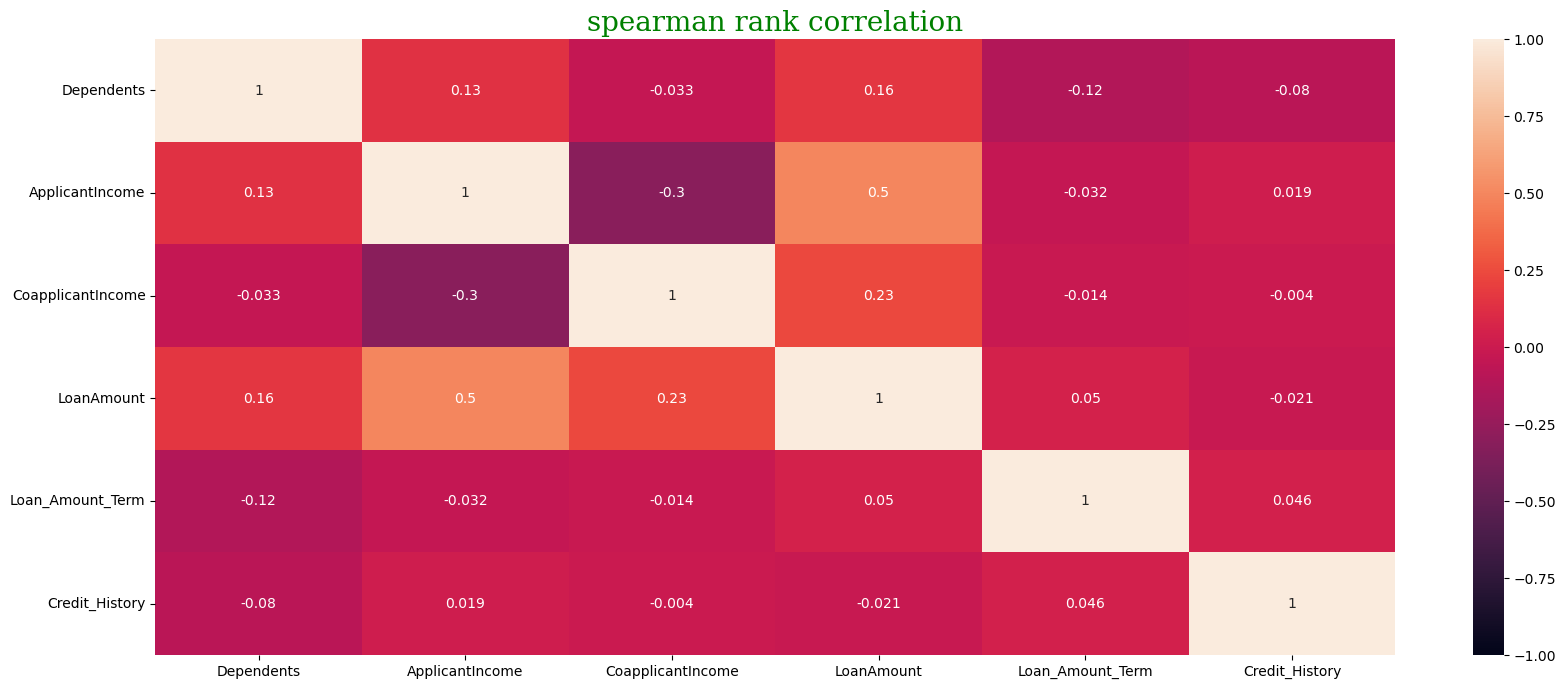

In [28]:
 #spearman rank corrlection heatmap
df_numeric.corr(method="spearman")  #selecting the method spearman
plt.figure(figsize=(20,8))           #setting the figuresize
heatmap=sns.heatmap(df_numeric.corr(method='spearman').round(3),vmin=-1,vmax=1,annot=True)  #annot= true means writting the data value in each cell
font2={'family':'serif','color':'green','size':20}
plt.title("spearman rank correlation",font2)
plt.show()

In [29]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [30]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#label encoding to convert cateograical data to into numerical data
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Married']=labelencoder.fit_transform(df['Married'])
df['Education']=labelencoder.fit_transform(df['Education'])
df['Self_Employed']=labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area']=labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status']=labelencoder.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,93.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,93.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
Q1=df.quantile(0.25).round(3)  #taking lower quantile into q2
Q3=df.quantile(0.75).round(3)  #taking upper quarantile to q3
IQR=Q3-Q1                       #calculating inter quantile range
print(IQR)

Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2868.50
CoapplicantIncome    2324.00
LoanAmount             67.75
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64


In [35]:
dfout=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
dfout.shape    #removing outliers

(187, 12)

In [36]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='ApplicantIncome'>

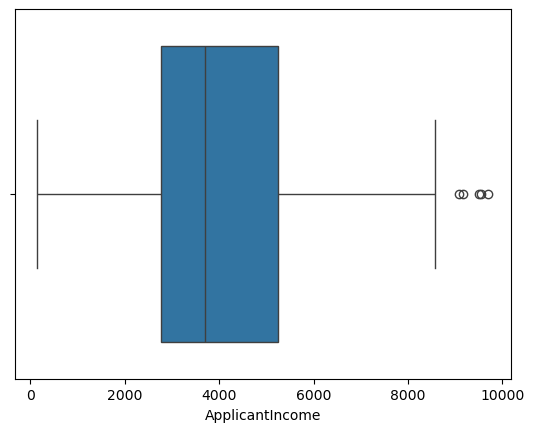

In [37]:
sns.boxplot(x=dfout['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

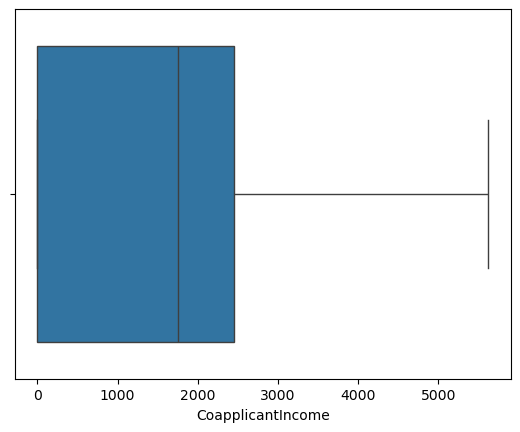

In [38]:
sns.boxplot(x=dfout['CoapplicantIncome'])

<Axes: xlabel='LoanAmount'>

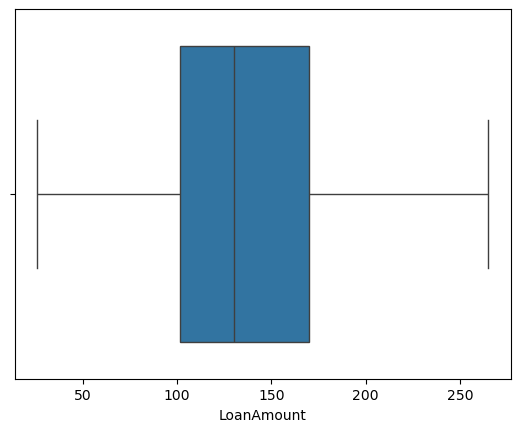

In [39]:
sns.boxplot(x=dfout['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term'>

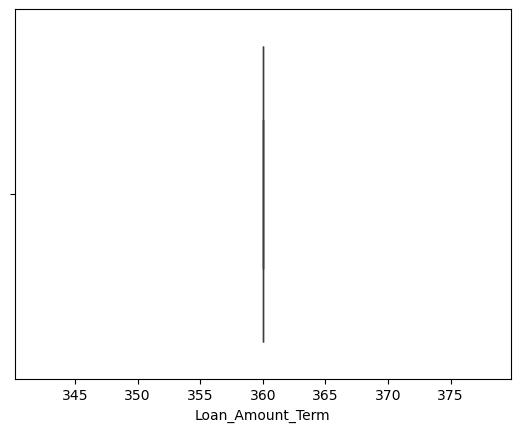

In [40]:
sns.boxplot(x=dfout['Loan_Amount_Term'])

<Axes: xlabel='Credit_History'>

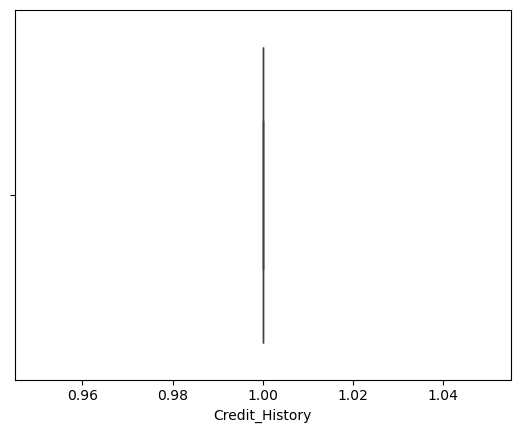

In [41]:
sns.boxplot(x=dfout['Credit_History'])

<Axes: xlabel='Property_Area'>

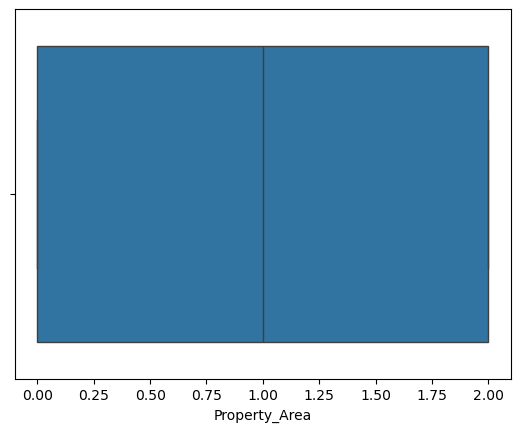

In [42]:
sns.boxplot(x=dfout['Property_Area'])

<Axes: xlabel='Dependents'>

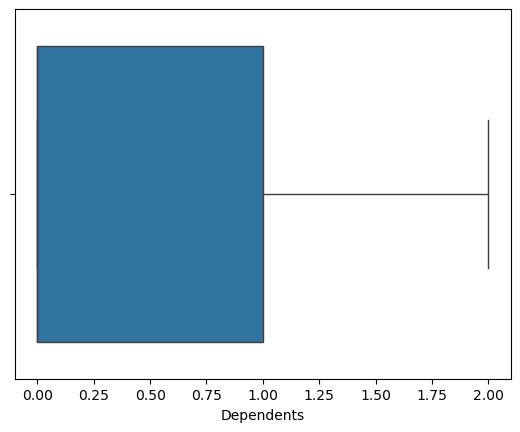

In [43]:
sns.boxplot(x=dfout['Dependents'])

<Axes: xlabel='Married'>

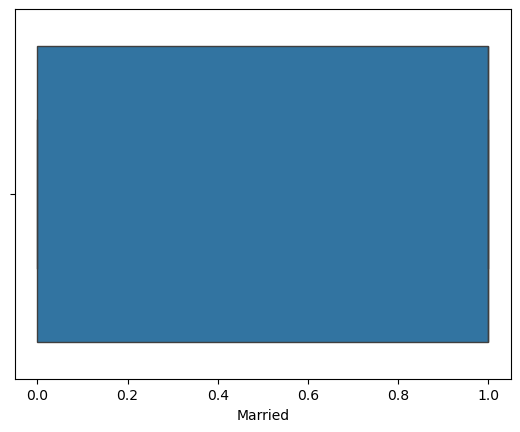

In [44]:
sns.boxplot(x=dfout['Married'])

<Axes: xlabel='Education'>

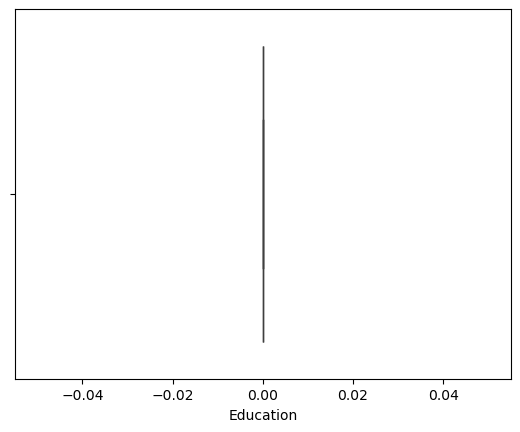

In [45]:
sns.boxplot(x=dfout['Education'])

<Axes: xlabel='Self_Employed'>

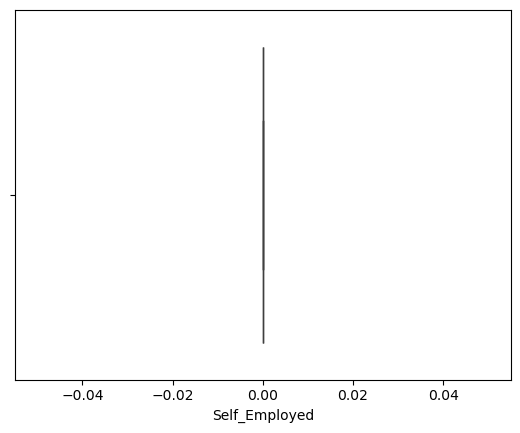

In [46]:
sns.boxplot(x=dfout['Self_Employed'])

In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
x=df.drop(['LoanAmount'],axis=1)  #dropping highly corelated features
x                              #new data set

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,360.0,1.0,2,1


In [49]:
 #dependent variables to y
y=df['LoanAmount']
y

0       93.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
593     71.0
594     40.0
595    253.0
596    187.0
597    133.0
Name: LoanAmount, Length: 598, dtype: float64

In [50]:
#split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
405,1,1,0.0,1,0,2253,2033.0,360.0,1.0,0,1
250,1,0,0.0,1,0,6045,0.0,360.0,0.0,0,0
333,0,0,0.0,0,0,2378,0.0,360.0,1.0,0,0
224,1,1,1.0,0,0,2491,2054.0,360.0,1.0,1,1
312,1,1,1.0,0,1,10000,0.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0.0,0,0,1811,1666.0,360.0,1.0,2,1
9,1,1,1.0,0,0,12841,10968.0,360.0,1.0,1,0
359,1,0,0.0,0,0,5124,0.0,360.0,0.0,0,0
192,0,0,0.0,1,0,1907,2365.0,360.0,1.0,2,1


In [52]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
127,1,0,0.0,0,1,20166,0.0,480.0,1.0,2,1
48,0,0,0.0,0,0,4000,2275.0,360.0,1.0,1,1
485,1,1,0.0,0,0,4625,2857.0,12.0,0.5,2,1
407,0,0,0.0,0,0,2995,0.0,360.0,1.0,2,1
225,1,1,0.0,0,1,3716,0.0,180.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
441,1,1,2.0,1,0,2309,1255.0,360.0,0.0,0,0
397,0,0,0.0,0,0,4547,0.0,360.0,1.0,1,1
134,1,1,2.0,0,1,3316,3500.0,360.0,1.0,2,1
339,1,1,2.0,1,0,3083,2168.0,360.0,1.0,2,1


In [53]:
y_train

405    110.0
250    115.0
333     46.0
224    104.0
312    155.0
       ...  
277     54.0
9      349.0
359    124.0
192    120.0
559    275.0
Name: LoanAmount, Length: 418, dtype: float64

In [54]:
y_test

127    650.0
48     144.0
485    111.0
407     60.0
225     42.0
       ...  
441    125.0
397    115.0
134     88.0
339    126.0
579    110.0
Name: LoanAmount, Length: 180, dtype: float64

In [55]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit scaler on training data
x_train=sc.fit_transform(x_train)
#tranform testing data
x_test=sc.transform(x_test)

In [56]:
x_train

array([[ 0.49026124,  0.73264228, -0.73396531, ...,  0.45287064,
        -1.29196043,  0.69067489],
       [ 0.49026124, -1.3649226 , -0.73396531, ..., -2.3309518 ,
        -1.29196043, -1.44785921],
       [-2.03972886, -1.3649226 , -0.73396531, ...,  0.45287064,
        -1.29196043, -1.44785921],
       ...,
       [ 0.49026124, -1.3649226 , -0.73396531, ..., -2.3309518 ,
        -1.29196043, -1.44785921],
       [-2.03972886, -1.3649226 , -0.73396531, ...,  0.45287064,
         1.24940173,  0.69067489],
       [ 0.49026124,  0.73264228,  1.27452896, ...,  0.45287064,
         1.24940173,  0.69067489]])

In [57]:
x_test

array([[ 0.49026124, -1.3649226 , -0.73396531, ...,  0.45287064,
         1.24940173,  0.69067489],
       [-2.03972886, -1.3649226 , -0.73396531, ...,  0.45287064,
        -0.02127935,  0.69067489],
       [ 0.49026124,  0.73264228, -0.73396531, ..., -0.93904058,
         1.24940173,  0.69067489],
       ...,
       [ 0.49026124,  0.73264228,  1.27452896, ...,  0.45287064,
         1.24940173,  0.69067489],
       [ 0.49026124,  0.73264228,  1.27452896, ...,  0.45287064,
         1.24940173,  0.69067489],
       [ 0.49026124, -1.3649226 , -0.73396531, ...,  0.45287064,
        -1.29196043,  0.69067489]])

In [58]:
y_train

405    110.0
250    115.0
333     46.0
224    104.0
312    155.0
       ...  
277     54.0
9      349.0
359    124.0
192    120.0
559    275.0
Name: LoanAmount, Length: 418, dtype: float64

In [59]:
y_test

127    650.0
48     144.0
485    111.0
407     60.0
225     42.0
       ...  
441    125.0
397    115.0
134     88.0
339    126.0
579    110.0
Name: LoanAmount, Length: 180, dtype: float64

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(x_test)

# Calculate performance metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / np.abs(y_test)))
accuracy_lr = 100 * (1 - mape_lr)

# Print the performance metrics for Linear Regression
print('Linear Regression Metrics:')
print('Mean Absolute Error (MAE):', mae_lr)
print('Mean Squared Error (MSE):', mse_lr)
print('Root Mean Squared Error (RMSE):', rmse_lr)
print('Mean Absolute Percentage Error (MAPE):', round(mape_lr * 100, 2))
print('Accuracy:', round(accuracy_lr, 2))

Linear Regression Metrics:
Mean Absolute Error (MAE): 48.00494363464563
Mean Squared Error (MSE): 8009.928168774445
Root Mean Squared Error (RMSE): 89.49820204213292
Mean Absolute Percentage Error (MAPE): 47.27
Accuracy: 52.73


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the decisiontree Regression model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_lr)
mape= np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
accuracy = 100 * (1 - mape)

# Print the performance metrics for decisiontree Regression
print('DecisionTree Regressor Metrics:')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(accuracy, 2))

DecisionTree Regressor Metrics:
Mean Absolute Error (MAE): 56.24444444444445
Mean Squared Error (MSE): 9677.947222222223
Root Mean Squared Error (RMSE): 89.49820204213292
Mean Absolute Percentage Error (MAPE): 55.2
Accuracy: 44.8


In [63]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=100,random_state=42)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
mape_rf=np.mean(np.abs((y_test-y_pred_rf)/np.abs(y_test)))
accuracy_rf=100*(1-mape_rf)
print('Random Forest Regressor Metrics:')
print('Mean Absolute Error(MAE):',mae_rf)
print('Mean Squared Error(MSE):',mse_rf)
print('Root Mean Squared Error(RMSE):',rmse_rf)
print('Mean Absolute Percentage Error(MAPE):',round(mape_rf*100,2))
print('Accuracy:',round(accuracy_rf,2))

Random Forest Regressor Metrics:
Mean Absolute Error(MAE): 46.05350000000001
Mean Squared Error(MSE): 6109.214261414814
Root Mean Squared Error(RMSE): 78.16146276404258
Mean Absolute Percentage Error(MAPE): 45.83
Accuracy: 54.17


In [64]:
import xgboost as xgb
model_xgb=xgb.XGBRegressor()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
mape_xgb=np.mean(np.abs((y_test-y_pred_xgb)/np.abs(y_test)))
accuracy_xgb=100*(1-mape_xgb)
print('Random Forest Regressor Metrics:')
print('Mean Absolute Error(MAE):',mae_xgb)
print('Mean Squared Error(MSE):',mse_xgb)
print('Root Mean Squared Error(RMSE):',rmse_xgb)
print('Mean Absolute Percentage Error(MAPE):',round(mape_xgb*100,2))
print('Accuracy:',round(accuracy_xgb,2))

Random Forest Regressor Metrics:
Mean Absolute Error(MAE): 45.96549235449897
Mean Squared Error(MSE): 6493.336523512219
Root Mean Squared Error(RMSE): 80.58124175955729
Mean Absolute Percentage Error(MAPE): 46.69
Accuracy: 53.31


In [65]:
#cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=LinearRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[ 0.2506582   0.33267469  0.24509302  0.19766521  0.40541201 -0.10024887
  0.29152154  0.27408253  0.41273739  0.2873747 ]

Mean Cross-validation Accuracy: 0.25969704259283677


In [66]:
#cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=DecisionTreeRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[ 0.17742084  0.15526239 -0.41017648  0.28338204  0.10553942  0.08971798
  0.11887839  0.24785536  0.0063674  -0.00361239]

Mean Cross-validation Accuracy: 0.07706349527574641


In [67]:
#cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=RandomForestRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[ 0.38118475  0.37759925  0.48261391  0.19057582  0.3244103   0.43190315
 -0.05289851  0.30326311  0.35709669  0.34033831]

Mean Cross-validation Accuracy: 0.3136086769204535


In [68]:
#cross validation for our model
from sklearn.model_selection import ShuffleSplit, cross_val_score
model=DecisionTreeRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[ 0.09267831  0.12628372  0.26010754  0.19049196  0.03177925  0.19124788
 -0.22352555 -0.19203235  0.22800818  0.037592  ]

Mean Cross-validation Accuracy: 0.07426309578085881


In [69]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
model_xgb=xgb.XGBRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[ 0.08937999  0.13813964 -0.38240686 -0.63408081 -0.05056207 -0.39608516
  0.14155706  0.17524602 -0.2619852  -0.37708533]

Mean Cross-validation Accuracy: -0.15578827204069534


In [70]:
model_xgb=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
#define shufflesplit cross validation
ssplit=ShuffleSplit(n_splits=10,test_size=0.3)
#perform cross validation
results_xgb=cross_val_score(model_xgb,x,y,cv=ssplit)
#print results for each fold
print("Cross-validation results for each fold:")
print(results_xgb)
print("\nMean Cross-validation Accuracy:",np.mean(results_xgb))

Cross-validation results for each fold:
[ 0.22298754  0.18022799  0.18421171  0.5178995   0.24553868  0.32848598
  0.1560713  -0.26016745  0.25079304  0.19581632]

Mean Cross-validation Accuracy: 0.20218646132191015


In [71]:
"""import pickle
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=42)
model_rf.fit(x_train,y_train)
with open('Loan_Status_model.pkl','wb') as file:
  pickle.dump(model_rf,file)
print('Model saved successfully')"""

"import pickle\nfrom sklearn.ensemble import RandomForestRegressor\nmodel_rf = RandomForestRegressor(n_estimators=100,random_state=42)\nmodel_rf.fit(x_train,y_train)\nwith open('Loan_Status_model.pkl','wb') as file:\n  pickle.dump(model_rf,file)\nprint('Model saved successfully')"

In [72]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Example: Train a model (linear regessor as an example)
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
# Save the trained model to a file using pickle
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)
print("Model saved successfully.")

Model saved successfully.


In [73]:
with open('sc.pkl','wb') as scaler_file:
  pickle.dump(sc,scaler_file)

In [74]:
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained linear regression model
with open('model_lr.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Define mappings for categorical variables
gender_mapping = {'Male': 1, 'Female': 0}
married_mapping = {'Yes': 1, 'No': 0}
education_mapping = {'Graduate': 1, 'Not Graduate': 0}
self_employed_mapping = {'Yes': 1, 'No': 0}
property_area_mapping = {'Urban': 2, 'Semiurban': 1, 'Rural': 0}
loan_status_mapping = {'Y': 1, 'N': 0}

# Create the web app
st.title('Loan Amount Prediction App')

# User inputs
gender = st.selectbox('Gender', list(gender_mapping.keys()))
married = st.selectbox('Married', list(married_mapping.keys()))
dependents = st.number_input('Dependents', min_value=0, max_value=10, step=1)
education = st.selectbox('Education', list(education_mapping.keys()))
self_employed = st.selectbox('Self Employed', list(self_employed_mapping.keys()))
applicant_income = st.number_input('Applicant Income', min_value=0)
coapplicant_income = st.number_input('Coapplicant Income', min_value=0)
loan_amount_term = st.number_input('Loan Amount Term (in months)', min_value=0)
credit_history = st.selectbox('Credit History', [1, 0])
property_area = st.selectbox('Property Area', list(property_area_mapping.keys()))
loan_status= st.selectbox('Loan_Status', list(loan_status_mapping.keys()))
loan_status_encoded = loan_status_mapping[loan_status]
# Encode user inputs
gender_encoded = gender_mapping[gender]
married_encoded = married_mapping[married]
education_encoded = education_mapping[education]
self_employed_encoded = self_employed_mapping[self_employed]
property_area_encoded = property_area_mapping[property_area]

# Create the feature array
features = np.array([[gender_encoded, married_encoded, dependents, education_encoded, self_employed_encoded,
                      applicant_income, coapplicant_income, loan_amount_term, credit_history, property_area_encoded,loan_status_encoded]], dtype=np.float64)

# Make prediction
if st.button('Predict'):
    output = model.predict(features)
    if output[0] == 1:
        st.write('Loan Approved')
    else:
        st.write('Loan Not Approved')
"""
# Save the code to a file
import os

file_path = os.path.join(os.getcwd(), 'loanpredictionapp.py')

try:
    with open(file_path, 'w') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")
    

File 'C:\Users\91997\Downloads\loanpredictionapp.py' has been saved.
